## Objective 

At the end of this experiment, you will be able to :

* Understand Sklearn Library and its API viz. Data API, Model API, Model Evaluation API, Model Selection API.
* Use some functionality of different modules of above metioned API.
* Perform Linear regression and Logistic regression 

## Linear Regression

#### Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

### Dataset
### Description
The dataset chosen for this experiment is in text format, having two columns of numbers. This is a hypothetical dataset, and we can think of the first column as visitor's count and the second column as revenue generated in any shopping mall. Say, the data been has collected at a frequency of every week. So, these are weekly visitors count and revenue. The dataset contains 97 records, i.e. entries for the previous  97 weeks.

#### Attribute/Features

* Visitor_Count
* Revenue

In [2]:
#@title Run this cell to download the dataset.
!wget -qq https://cdn.iiith.talentsprint.com/IOT/Data/data1.txt

In [3]:
data=pd.read_csv('data1.txt',header=None)
data.rename(columns={0:'Visitor_Count',1:'Revenue'},inplace=True)
data.head()

,Visitor_Count,Revenue
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Visitor_Count  97 non-null     float64
 1   Revenue        97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Text(0, 0.5, 'Revenue in 10,000')

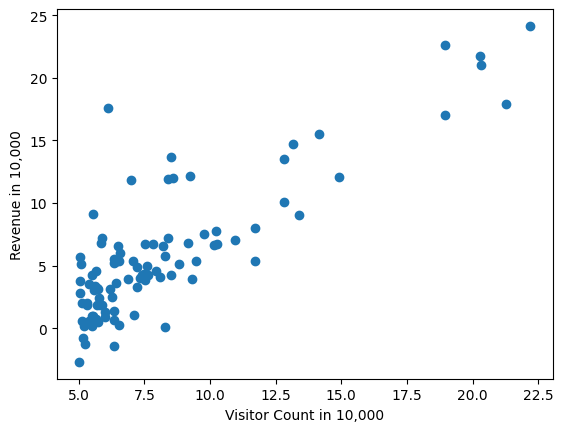

In [5]:
plt.scatter(data.Visitor_Count,data.Revenue)
plt.xlabel('Visitor Count in 10,000')
plt.ylabel('Revenue in 10,000')

In [6]:
## Saving a pandas table into excel file
data.to_excel('/content/df.xlsx') # '/content/df.xlsx'

#### Splitting the data into features and target

In [7]:
X=data.iloc[:,0].values.reshape(-1,1)
print(X.shape)
Y=data.iloc[:,1].values
m=len(Y)# gives number of training samples
print(m)

(97, 1)
97


#### Splitting the data into train and test
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [8]:
np.random.seed(0)
np.random.randint(1,5,4)

array([1, 4, 2, 1])

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split( X,Y,test_size=0.25, random_state=0)

In [10]:
print(X_train.shape)
print(X_test.shape)

(72, 1)
(25, 1)


#### Using LinearRegrssion library from sklearn

[Ordinary least squares Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [11]:
reg = LinearRegression().fit(X_train, Y_train)

#### Displaying coefficient and intercept of the approximated linear model

In [12]:
m=reg.coef_  ## Gives coefficient
m

array([1.20934991])

In [13]:
c=reg.intercept_  ## gives intercepts
c

-4.106160513581714

In [14]:
# y=1.20934991*x+ -4.106160513581714

#### Prediction of price for X_test feature

In [15]:
X_test

array([[12.828 ],
       [ 6.5159],
       [ 8.5186],
       [ 6.3589],
       [ 5.4994],
       [ 5.1884],
       [ 6.3654],
       [10.274 ],
       [ 6.3328],
       [ 8.2951],
       [ 7.6031],
       [ 5.0594],
       [ 7.3345],
       [ 8.4084],
       [ 8.5781],
       [ 5.2524],
       [ 5.4901],
       [ 5.5649],
       [ 5.8918],
       [ 6.4862],
       [ 5.7737],
       [21.279 ],
       [ 7.0032],
       [ 9.1802],
       [ 7.0931]])

In [16]:
y_pred=reg.predict(X_test) ## prediction for test set
y_pred

array([11.40738019,  3.7738426 ,  6.19580767,  3.58397466,  2.54453841,
        2.16843058,  3.59183543,  8.31870051,  3.55241063,  5.92551796,
        5.08864782,  2.01242444,  4.76381644,  6.06253731,  6.26776399,
        2.24582898,  2.53329145,  2.62375083,  3.01908731,  3.7379249 ,
        2.87626309, 21.62759632,  4.36315881,  6.99591357,  4.47187937])

In [17]:
Y_test

array([13.501  ,  5.3436 , 13.662  , -1.4211 ,  1.0173 ,  0.20421,
        5.3048 ,  6.7526 ,  1.4233 ,  5.7442 ,  4.9981 ,  2.8214 ,
        4.0259 ,  7.2258 , 12.     , -1.22   ,  4.263  ,  3.0825 ,
        1.8495 ,  6.5987 ,  2.4406 , 17.929  , 11.854  ,  6.7981 ,
        1.0463 ])

#### Calculating the accuracy score

In [18]:
reg.score(X_test,Y_test)  ## coefficient of determination R^2 of the prediction ? 

0.5853498094619267

In [19]:
reg.score(X_test,y_pred) ## When Predicted value 'y_pred' is same as that of test value 'y_test'

1.0

#### Other methods for measuring accuracy
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)

Calculation of RMSE is shown below:

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
reg.fit(X_train, Y_train)   # Fitting the data  for generating Model 
y_train_predict = reg.predict(X_train)  # prediction the output 'y' for each input 'x'

RMSE=np.sqrt(mean_squared_error(Y_train, y_train_predict))
print('Root Mean Squared Error = ',RMSE)

Root Mean Squared Error =  2.9433711368280995


In [22]:
Y[0], X[0]

(17.592, array([6.1101]))

In [23]:
reg.predict(np.array([[6.1101]]))

array([3.2830884])

In [24]:
# 3.28 + -2.94 =  (6,1)

#### Visualizing predicted and original y (Revenue)

97


<function matplotlib.pyplot.show(close=None, block=None)>

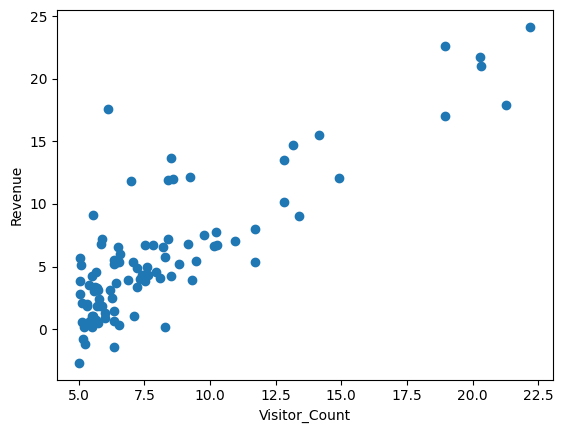

In [25]:
X=data.iloc[:,0].values
Y=data.iloc[:,1].values
m=len(Y)# gives number of training set
print(m)
plt.scatter(X,Y)
plt.xlabel('Visitor_Count')
plt.ylabel('Revenue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

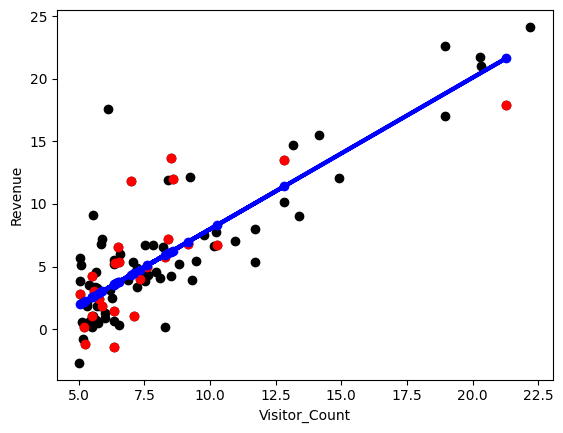

In [26]:
plt.scatter(X,Y,color='black')
plt.scatter(X_test, Y_test,  color='red')


plt.plot(X_test,y_pred, 'bo-', linewidth=3)


plt.xlabel('Visitor_Count')
plt.ylabel('Revenue')
plt.show

#### Predicting Revenue for any visitors count using the developed model

In [27]:
reg.predict(np.array([[10]]))

array([7.98733863])

## Logistic Regression  (Classification)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [28]:
# import required packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Example:1



In [29]:
#@title Run this cell to download the dataset.
!wget -qq https://cdn.iiith.talentsprint.com/IOT/Data/data3.txt

In [30]:
data=pd.read_csv('data3.txt',header=None)
data

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [32]:
## taking only integer values
for i in range(2):
  data[i]=data[i].astype('int')

In [33]:
data.head()

,0,1,2
0,34,78,0
1,30,43,0
2,35,72,0
3,60,86,1
4,79,75,1


In [34]:
X=data.iloc[:,0:2]
X

,0,1
0,34,78
1,30,43
2,35,72
3,60,86
4,79,75
...,...,...
95,83,48
96,42,87
97,99,68
98,55,64


##### Separating data in two group: one for all Y=0 and another for all Y=1 and Plotting 

In [35]:
data1=data[data[2]==1]
data2=data[data[2]==0]

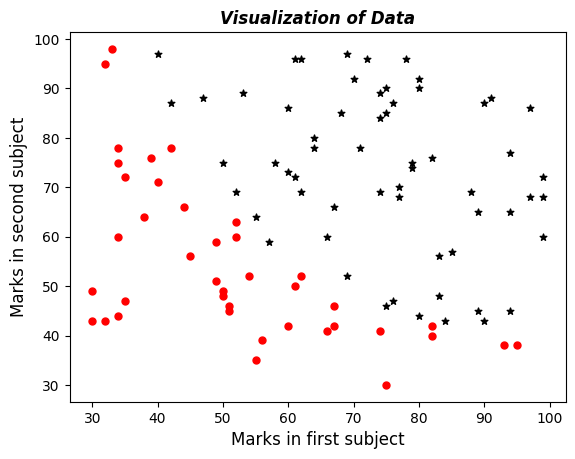

In [36]:
## Plotting
plt.scatter(data1[0],data1[1],color='k',s=25,marker='*') #All the data with Y=1,represented by Black,Admitted
plt.scatter(data2[0],data2[1],color='r',s=25,marker='o') # All data with Y=0 ,represented by Red,Rejected
plt.title('Visualization of Data',fontsize=12,style='italic',fontweight='bold')
plt.xlabel('Marks in first subject',fontsize=12)
plt.ylabel('Marks in second subject',fontsize=12)
plt.show()

### It can be plotted in another way

In [37]:
X=data.iloc[:,[0,1]]
print(X)
Y=data.iloc[:,2]
print(Y)

     0   1
0   34  78
1   30  43
2   35  72
3   60  86
4   79  75
..  ..  ..
95  83  48
96  42  87
97  99  68
98  55  64
99  74  89

[100 rows x 2 columns]
0     0
1     0
2     0
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: 2, Length: 100, dtype: int64


In [38]:
X[0]

0     34
1     30
2     35
3     60
4     79
      ..
95    83
96    42
97    99
98    55
99    74
Name: 0, Length: 100, dtype: int64

In [39]:
Y

0     0
1     0
2     0
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: 2, Length: 100, dtype: int64

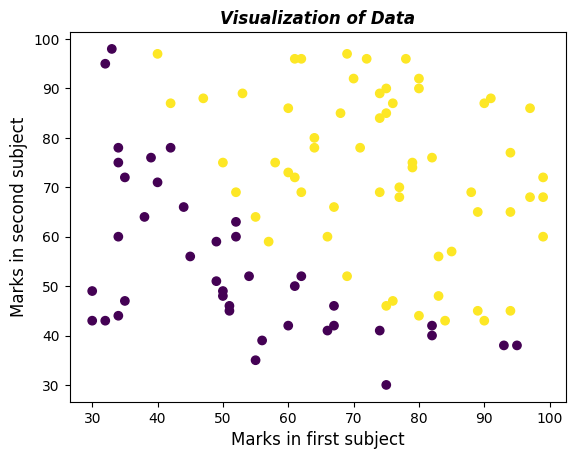

In [40]:
plt.scatter(X[0],X[1],c=Y)
plt.title('Visualization of Data',fontsize=12,style='italic',fontweight='bold')
plt.xlabel('Marks in first subject',fontsize=12)
plt.ylabel('Marks in second subject',fontsize=12)
plt.show()

In [41]:
clf = LogisticRegression(random_state=42, solver='lbfgs',multi_class='multinomial')
clf.fit(X,Y)

LogisticRegression(multi_class='multinomial', random_state=42)

In [42]:
clf.predict([[90,60]])

array([1])

In [43]:
clf.score(X, Y)

0.89

In [44]:
clf.coef_ 

array([[0.10467617, 0.10195817]])

In [45]:
A=clf.coef_[0,0]
B=clf.coef_[0,1]
A,B

(0.10467616763554081, 0.10195817314315918)

In [46]:
clf.intercept_

array([-12.65064092])

In [47]:
C=clf.intercept_[0]

AX+BY+C=0 

Y=(-c-AX)/B

Y= (- clf.intercept_[0] - clf.coef_[0,0] *X[0] )/ clf.coef_[0,1]


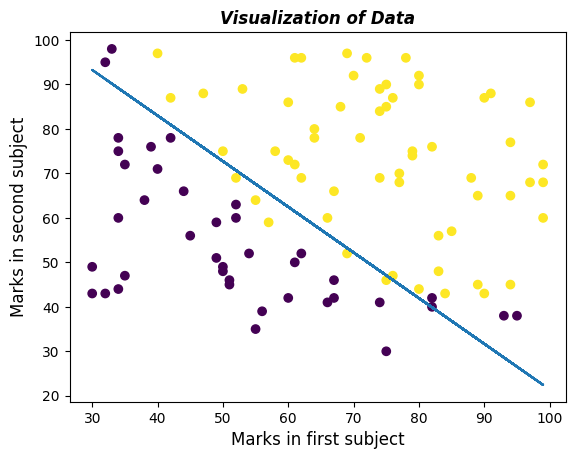

In [48]:
##PLOTTING Decision Boundary 
## Converting AX+BY+C=0 into --> y=mx+c1
Y1=(-(clf.intercept_[0])-clf.coef_ [0,0]*X[0])/clf.coef_ [0,1]
plt.plot(X[0],Y1)
########Plotting given data
plt.scatter(X[0],X[1],c=Y)
plt.title('Visualization of Data',fontsize=12,style='italic',fontweight='bold')
plt.xlabel('Marks in first subject',fontsize=12)
plt.ylabel('Marks in second subject',fontsize=12)
plt.show()

### Example:2
### Load the Data

#### Description of Data
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. 

* Preg: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)

In [49]:
#@title Run this cell to download the dataset.
!wget -qq https://cdn.iiith.talentsprint.com/IOT/Data/diabetes.csv

In [50]:
# Load the diabetes dataset
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
# Extract features and labels
X = diabetes.drop("Outcome",axis=1)
y = diabetes["Outcome"]

In [52]:
# Split the data into train and test data
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(576, 8) (192, 8) (576,) (192,)


In [53]:
X_train.values.mean(axis=0)

array([  3.74131944, 120.65972222,  69.50520833,  20.49479167,
        80.36284722,  31.98177083,   0.46861806,  32.921875  ])

In [54]:
X_train.values.std(axis=0)

array([  3.30258122,  32.10527674,  18.38383123,  15.41125943,
       116.12260915,   7.61558373,   0.33903031,  11.49754536])

In [55]:
# BIG NO X_test.values.mean(axis=0)

In [56]:
# BIG NO X_test.values.std(axis=0)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) ## What is happenning inside
X_test_scaled = scaler.transform(X_test) ## 

### Apply Logistic Regression

In [58]:
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train)
y_pred = LR.predict(X_test_scaled)
print("Accuracy of Logistic Regression is:",accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression is: 0.7291666666666666


### Example of prediction for new sample

In [59]:
sample=np.array ([[6,148,72,35,0,33.6,0.627,50]])
sample

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ]])

In [60]:
sample_scaled = scaler.transform(sample) ## 
sample_scaled

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.6839137 ,  0.85158206,  0.13570575,  0.9412085 , -0.69205168,
         0.21248918,  0.46716161,  1.4853714 ]])

In [61]:
Sample_pred = LR.predict(sample_scaled)
Sample_pred

array([1])

### Example dataset API

In [62]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
print(X)
print(y)

[[ 1.61383833 -0.49115086]
 [ 0.08984723  0.50439056]
 [ 0.74721047 -0.36911116]
 [-1.10174514  0.23685641]
 [-0.72871455  0.14652347]
 [-0.65891281  0.857088  ]
 [ 0.22828266  0.73453868]
 [ 1.39439184 -0.45063627]
 [ 0.87158283  0.70852888]
 [ 0.88304472 -0.12658445]
 [ 0.38220326  0.76957897]
 [-0.32279169  0.92145523]
 [ 1.29900621 -0.64914275]
 [-0.63569974  0.91873422]
 [ 1.96899387  0.297549  ]
 [ 1.21073294  0.37721455]
 [ 1.13998191 -0.36088456]
 [ 1.06805159 -0.53460667]
 [ 0.49598571  0.66135542]
 [-0.26038715  0.88295876]
 [-0.06516219  0.13092506]
 [ 1.87005845 -0.18659309]
 [ 0.03146515  0.79868048]
 [-1.03151461  0.35788726]
 [ 0.45814234  0.00308109]
 [ 0.40767679  0.9574049 ]
 [-0.9379972   0.46846678]
 [ 2.02675758  0.09006383]
 [ 0.73867736  0.52356398]
 [ 0.71349755 -0.61055519]
 [ 0.92445501  0.79897643]
 [-1.05805492  0.1152524 ]
 [ 1.80904221 -0.49580332]
 [-0.17181754  1.27111359]
 [ 2.22167197 -0.16625369]
 [ 0.8346617   0.34040713]
 [ 0.28332589 -0.45537977]
 

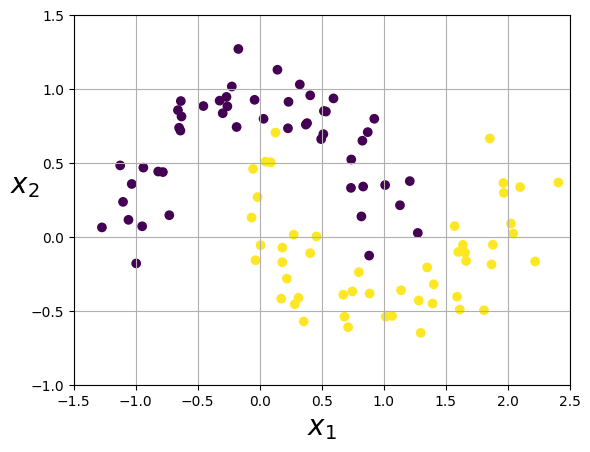

In [63]:
axes=[-1.5, 2.5, -1, 1.5] # how?
plt.scatter(X[:,0],X[:,1],c=y)
plt.axis(axes)
plt.grid(True, which='both')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.show()